In [1]:
from PIL import Image
import pandas as pd
import json
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [26]:
file = './annotations.csv'
csv = pd.read_csv(file)
print('All classes')
csv['region_attributes'].value_counts()

All classes


{"class":"Up"}           11
{"class":"DownRight"}    11
{"class":"Right"}        10
{"class":"DownLeft"}     10
{"class":"UpRight"}      10
{"class":"Back"}         10
{"class":"Front"}        10
{"class":"UpLeft"}       10
{"class":"Top"}          10
{"class":"Left"}         10
{"class":"Down"}          9
Name: region_attributes, dtype: int64

In [3]:
def load_dataset(csv_file):
    data = []
    for row in csv.iterrows():
        img = Image.open('./face_images_merged/{}'.format(row[1]['filename']))
        img_bbox = json.loads(row[1]['region_shape_attributes'])
        # todo -- add img width and hight while creating annotataions   
        # currently size is used from pillow obj        
        width, height = img.size
        xmin,ymin = img_bbox['x'] , img_bbox['y'] , 
        xmax,ymax =  xmin + img_bbox['width'] , ymin + img_bbox['height']
        # normalize values from 0 to 1
        xmin = xmin / width
        ymin = ymin / height
        xmax = xmax / width
        ymax = ymax / height
        # kmenas data         
        data.append([xmax - xmin, ymax - ymin])
    return np.array(data)

In [11]:
# convert the dataset
final_data = load_dataset(csv)
# find kmeans cluster
kmens_cluster = KMeans(n_clusters=4)
kmens_output = kmens_cluster.fit_predict(final_data)

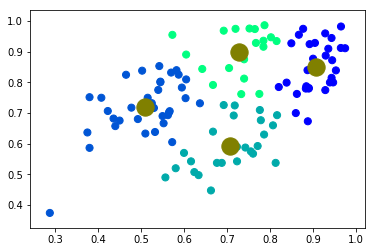

In [24]:
# plot kmeans cluster with centroid points
plt.scatter(final_data[:,0], final_data[:,1],c = kmens_cluster.labels_, s=50, cmap='winter')
plt.scatter(kmens_cluster.cluster_centers_[:, 0], kmens_cluster.cluster_centers_[:, 1], s=300, c='olive')